In [ ]:
import jax

In [ ]:
import resource
low, high = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (high, high))

In [14]:
import tensorflow as tf

In [2]:
from scenic.projects.glc.data.glc_dataset import TFRecordDatasetFactory

In [4]:
import functools, ml_collections

In [ ]:
from scenic.projects.glc.configs.resnet import get_config

config = get_config()


In [2]:
import tensorflow as tf

In [3]:
path = "/network/scratch/t/tengmeli/temp_glc/train_images_new3.tfrecords"

In [16]:
dataset = tf.data.TFRecordDataset([path])

In [17]:
import scenic.projects.glc.data.tf_dataset as tf_dataset

In [18]:

#pass every single feature through our mapping function
dataset = dataset.map(
    (lambda x: tf_dataset.parse_tfr_element(x, ["rgb", "nir"], "train"))
)


In [19]:
ite = next(iter(dataset))

In [ ]:
dataset = dataset.map(lambda x: 
        data_augmentations(x))

In [1]:
from scenic.projects.glc.configs.resnet import get_config

config = get_config()

from scenic.projects.glc.data.glc_dataset import get_dataset
ds = get_dataset(dataset_configs=config,
    batch_size=config.batch_size,
    eval_batch_size=config.batch_size,
    dtype_str = 'float32',
    bands = ["rgb"])

2022-10-17 11:49:08.954161: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 11:49:09.329029: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 11:49:09.380169: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 11:49:12.251242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object f

In [18]:
import scenic.projects.baselines.resnet 

In [5]:
it = next(ds.valid_iter)

In [10]:
img = it["inputs"][0][0][:,:,:3]

In [11]:
img = (img - (img.min()))/(img.max()-img.min())

In [16]:
from PIL import Image
import numpy as np

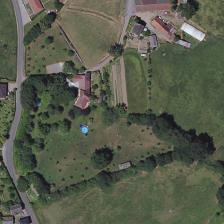

In [17]:
Image.fromarray((img*255).astype(np.uint8))

In [3]:
config.get('data_augmentations', None)

['glc_default']

In [40]:
def get_augmentations(example, dtype=tf.float32, data_augmentations=None, crop_size=224):
    """Apply data augmentation on the given training example.

    Args:
    example: dict; Example that has an 'image' and a 'label'.
    dtype: Tensorflow data type; Data type of the image.
    data_augmentations: list(str); Types of data augmentation applied on
      training data.

    Returns:
    An augmented training example.
    """

    image = tf.cast(example['inputs'], dtype=dtype)

    if data_augmentations is not None:
        if 'glc_default' in data_augmentations:
            image = dataset_utils.augment_random_crop_flip(
              image, crop_size,crop_size, num_channels,crop_padding=4, flip=True)
    
    image = tf.cast(image, dtype=dtype)
    return {'inputs': image, 'label': example['label']}

import functools

funct = functools.partial(get_augmentations, dtype=tf.float32, data_augmentations="glc_default", crop_size=224 )

In [41]:
import scenic.projects.glc.data.tf_dataset as tf_dataset

In [42]:
dataset = tf.data.TFRecordDataset(["/network/scratch/t/tengmeli/temp_glc/train_images_new3.tfrecords"])

    #pass every single feature through our mapping function
dataset = dataset.map(
    (lambda x: tf_dataset.parse_tfr_element(x, ["rgb"], "train"))
)

In [43]:
ds = dataset.map(
    (lambda x: funct(x))
)

In [44]:
next(iter(ds))

{'inputs': <tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[-0.5282556 , -0.33155292, -0.91498196],
         [-0.5282556 , -0.33155292, -0.91498196],
         [-0.4106097 , -0.26467746, -0.8686872 ],
         ...,
         [-0.54786325, -0.46530387, -0.7760976 ],
         [-0.5086479 , -0.42072022, -0.7298028 ],
         [-0.5086479 , -0.42072022, -0.7298028 ]],
 
        [[-0.5674709 , -0.44301203, -1.0075716 ],
         [-0.43021736, -0.28696927, -0.8455398 ],
         [-0.27335614, -0.1086347 , -0.7066554 ],
         ...,
         [-0.54786325, -0.46530387, -0.7760976 ],
         [-0.6066862 , -0.46530387, -0.799245  ],
         [-0.5870786 , -0.44301203, -0.7760976 ]],
 
        [[-0.5282556 , -0.39842838, -0.96127677],
         [-0.25374848, -0.08634289, -0.63721323],
         [-0.03806432,  0.15886715, -0.42888662],
         ...,
         [-0.5282556 , -0.44301203, -0.7529502 ],
         [-0.6459015 , -0.5098875 , -0.8455398 ],
         [-0.6066862 , -0.46530387, 

In [36]:
next(iter(dataset))["inputs"].shape

TensorShape([256, 256, 3])

In [25]:
it["inputs"] = it["inputs"][1,:,:,:]

In [30]:
it["inputs"].shape

(256, 256, 4)

In [28]:
ds = ds.map(lambda x: funct(x))

AttributeError: 'Dataset' object has no attribute 'map'

In [18]:
it["inputs"].shape

(1, 32, 256, 256, 4)

In [ ]:
it["inputs"].shape

In [ ]:
drop_remainder= subset=="train"

In [ ]:
drop_remainder

In [ ]:
os.environ["XLA_FLAGS"]

In [ ]:
export XLA_FLAGS=--xla_gpu_cuda_data_dir=$CUDA_DIRos. environ['API_USER'] = 'username'